# Foundations of Data Science (FDS) CourseWork 1 - Semester 1, October 2020. 


#### Authors: Kobi Gal and David Sterratt

## Data Wrangling and visualization 
Released: Monday 19 October 2020 <br>
Deadline for submission: **Friday 30 Oct 4pm** on Learn

As per the Informatics [Late Coursework & Extensions](http://web.inf.ed.ac.uk/infweb/student-services/ito/admin/coursework-projects/late-coursework-extension-requests) policy, late coursework without an authorised extension will be recorded as late and the following penalties will apply:<br>

- 5 percentage points will be deducted for every calendar day or part thereof it is late, up to a maximum of 7 calendar days. 

- If you have not submitted coursework within these 7 days, a mark of zero will be recorded. 
<br>

**It is very important that you read and follow the instructions below to the letter: you will be deducted marks for not adhering to the advice below.**

### Good Scholarly Practice 

Please remember the University requirement as regards all assessed work for credit.  Details about this can be found at: [http://web.inf.ed.ac.uk/infweb/admin/policies/academic-misconduct](http://web.inf.ed.ac.uk/infweb/admin/policies/academic-misconduct)
<br>
Specifically, this coursework **must be your own work**. We want you to be able to discuss the class material with each other, but the coursework you submit must be your own work. You are free to form study groups and discuss the concepts related to, and the high-level approach to the coursework. **You may never share code or share write-ups**. It is also not permitted to discuss this coursework on Piazza. The only exception is that if you believe there is an error in the coursework, you may ask a private question to the instructors, and if we feel that the issue is justified, we will send out an announcement.

### General Instructions 

- This assignment accounts for 20% of the mark for this course and is graded based on a Jupyter notebook, which you are to submit via Learn (see below). The actual assignment is marked out of 100 and the number of marks is indicated by each question below. 

- The criteria on which you will be judged include the functional code, and the quality of the textual answers and plots asked for. 

- Read the instructions carefully, answering what is required and only that. Keep your answers brief and concise. 

- For answers involving figures, make sure to clearly label your plots and provide legends where necessary. You will gain marks for clear visualizations. 

- For answers involving numerical values, use correct units where appropriate and format floating point values to a reasonable number of decimal places. 

### Submission 

Your submission should be in the form of a Jupyter notebook including your code, the visualizations you created for each question, and your analysis. The notebook will read the given data and generate the requested visualizations - it is not necessary to show the exploration of the data.  Please submit the notebook in three formats: ipynb, html, and pdf.  

### Coursework questions 

In this coursework, we will ask you to analyse and visualize two datasets. The coursework includes data from Japanese restaurants that was collected from multiple review sites.
<br>
The Japanese Restaurant Review Dataset includes reviews from the following websites:  
- [Hot Pepper Gourmet](https://www.hotpepper-gourmet.com/en) (hpg): similar to [Yelp](https://www.yelp.com/search?find_desc=Restaurants&find_loc=japan), here users can search restaurants and also make a reservation online.

- [AirREGI](https://airregi.jp) / Restaurant Board (air): similar to [Square](https://squareup.com/us/en), a reservation control and cash register system. 

The data includes the ID of the restaurant, the date and time of visits and reservation-making, restaurant location in Japan, and restaurant type. You will find explanations about the files and variables in them in the “Information_On_Files.txt” file in the files you download in step 1 below. 
<br>
In this assignment you will need to obtain datasets from different sources, preprocess the data, and generate visualizations that show interesting patterns. 

#### IMPORTS

Execute the cell below to import all packages you will be using for this assignment.

In [1]:
import os
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import matplotlib as mpl
import warnings 
import math
warnings.filterwarnings('ignore')
np.random.seed(42)

print("All packages imported!")

All packages imported!


### Question 1: Download the datasets

Download the data sets from  
[https://github.com/Inf2-FDS/fds-coursework1](https://github.com/Inf2-FDS/fds-coursework1)
<br>
If you are using Noteable, you can clone this repository into Noteable as you have done with the Lab exercises. If you are not using Noteable, please do not fork the repository, leave the forked repository public, and thereby allow others to see your solutions. 

### Question 2: Same restaurants different datasets [20 marks]

The following question relates to customer visits in 2016 to those restaurants that appear in both **hpg** and **air** datasets (see store_id_relation.csv file). Which dataset generated more visits to these restaurants in 2016? Please visualize your answer. To determine whether a reservation was made for 2016 use the "visit_datetime" field in the respective reservation file hpg_reserve and air_reserve.

***Your code goes here:***

In [2]:
# Load data sets
store_id_relations = pd.read_csv("Data/store_id_relation.csv")
air_reserve = pd.read_csv("Data/air_reserve.csv")
air_reserve = air_reserve[air_reserve['visit_datetime'] < '2017-01-01 00:00:00']
hpg_reserve = pd.read_csv("Data/hpg_reserve.csv")
hpg_reserve = hpg_reserve[hpg_reserve['visit_datetime'] < '2017-01-01 00:00:00']

# Find relevant stores
air_stores = store_id_relations.loc[:,'air_store_id']
hpg_stores = store_id_relations.loc[:,'hpg_store_id']

air_store_ids_unique = air_reserve.loc[:,'air_store_id'].unique()
hpg_store_ids_unique = hpg_reserve.loc[:,'hpg_store_id'].unique()
combined_stores = [(a,b) for (a,b) in zip(air_stores,hpg_stores) if a in air_store_ids_unique and b in hpg_store_ids_unique]

In [3]:
# Compute number of reservations
air_store_reservations = [air_reserve[air_reserve['air_store_id']==s]['reserve_visitors'].sum() for (s,_) in combined_stores]
hpg_store_reservations = [hpg_reserve[hpg_reserve['hpg_store_id']==s]['reserve_visitors'].sum() for (_,s) in combined_stores]

In [4]:
f = lambda x,y: x-y
combined_stores = [(s[0],s[1],f(air_store_reservations[i],hpg_store_reservations[i])) for i,s in enumerate(combined_stores)]
combined_stores.sort(key=lambda x: x[2])


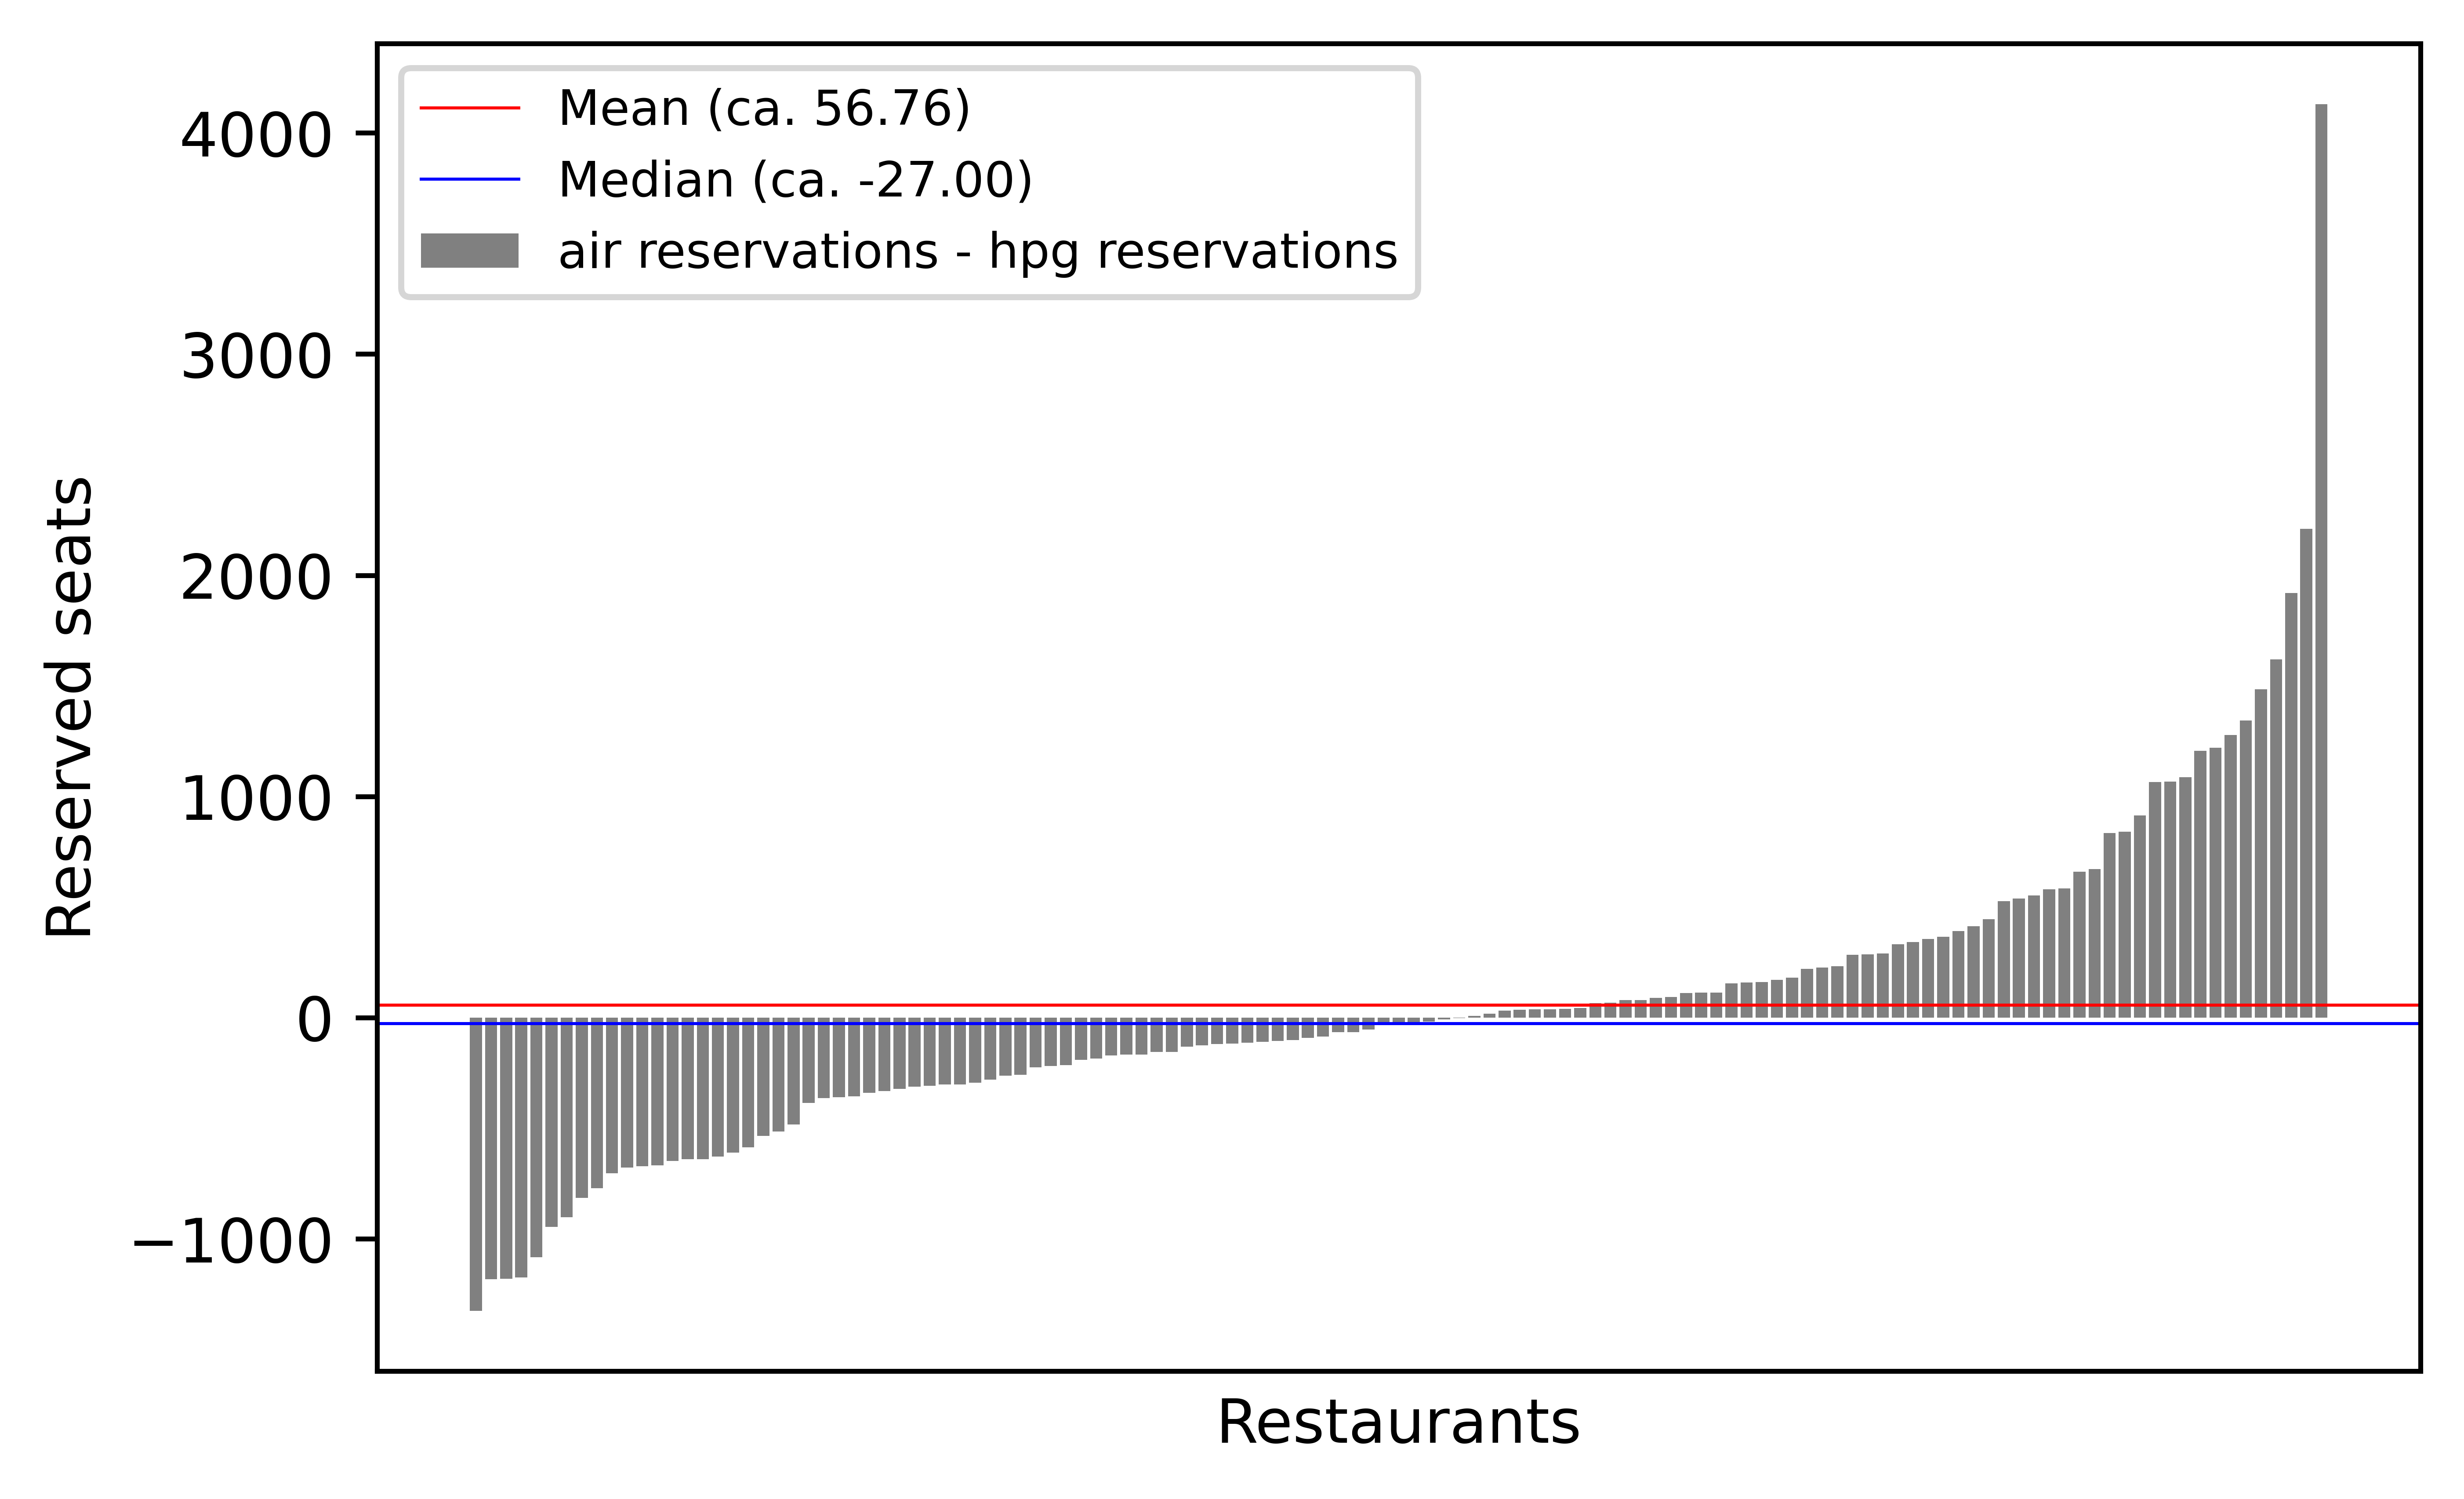

In [5]:
fig = plt.figure()
fig.set_dpi(1000)
xs = list(range(len(combined_stores)))
plt.bar(xs, [x[2] for x in combined_stores], color='gray', align='center', label="air reservations - hpg reservations")
avg = sum(map(lambda x: x[2],combined_stores))/len(combined_stores)
plt.axhline(avg,color='r',linewidth=0.5,label=f'Mean (ca. {avg:.2f})')
air_store_reservations[0]
plt.savefig("test.png")
plt.ylabel("Reserved seats")
plt.xlabel("Restaurants")
l = len(combined_stores)
median = (combined_stores[l//2][2] + combined_stores[(l-1)//2][2])/2
plt.axhline(median+0.5,color='b',linewidth=0.5,label=f'Median (ca. {median: .2f})')
plt.xticks([])
plt.legend(fontsize=8)
plt.show()

As you can see, the average difference between the number of reservations made through AIR and those made through HPG is positve. Therefore, on average, restaurants get more reservations through AIR. 
Note that the we are using the number of reserved seats in total, not the number of reservations, because the latter is of little economic interest by itself.

On the other hand, the median of those differences is negative. Thus there are more restaurants that get more reservations from hpg than there are restaurants that get reservations from air.

The answer to the question is not affected by the median, though. The air dataset did generate more visits in 2016 than the hpg dataset.

### Question 3: Restaurant genre and location [25 marks]

The following question relates to restaurants in the **air** dataset. Use a scatterplot to visualize restaurants by location and type of restaurant (you might want to add a small random noise to the restaurant location to reduce overlap in the plot). You can choose how to represent the restaurant location (e.g., longitude/latitude, distance from city centre, or other). Note there are many restaurant categories. You should collapse the different categories to 4 or 5 categories based on your best judgement (e.g., Asian, International, Bar and party, Cafe and sweets). What can you infer from the plot you created about the relationship of the restaurant categories and their location?

***Your code goes here:***

In [6]:
air_store_info = pd.read_csv('Data/air_store_info.csv')
air_visit_data = pd.read_csv('Data/air_visit_data.csv')
air_store_info['air_genre_name'].unique()
collapse_key = [('International',['Italian/French','International cuisine', 'Western food']), 
                ('Asian',['Yakiniku/Korean food','Izakaya','Okonomiyaki/Monja/Teppanyaki','Asian','Japanese food']),
                ('Cafe and sweets', ['Cafe/Sweets']),
                ('Bar and party', ['Dining bar', 'Bar/Cocktail', 'Karaoke/Party']),
                ('Other', ['Other', 'Creative cuisine'])]
collapse_dict = dict()
for v,ks in collapse_key:
    for k in ks:
        collapse_dict[k] = v
air_store_info = air_store_info.apply(lambda x: x.apply(lambda y: collapse_dict[y]) if x.name=='air_genre_name' else x)
air_store_info

,air_store_id,air_genre_name,air_area_name,latitude,longitude
0,air_0f0cdeee6c9bf3d7,International,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
1,air_7cc17a324ae5c7dc,International,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
2,air_fee8dcf4d619598e,International,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
3,air_a17f0778617c76e2,International,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
4,air_83db5aff8f50478e,International,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599
...,...,...,...,...,...
824,air_9bf595ef095572fb,International,Tōkyō-to Shibuya-ku Shibuya,35.661777,139.704051
825,air_764f71040a413d4d,Asian,Tōkyō-to Shibuya-ku Shibuya,35.661777,139.704051
826,air_10bbe8acd943d8f6,Asian,Tōkyō-to Shibuya-ku Shibuya,35.661777,139.704051
827,air_7514d90009613cd6,Bar and party,Hokkaidō Sapporo-shi Minami 3 Jōnishi,43.055460,141.340956


Text(0.5, 1.0, 'Locations of restaurants by category in Japan')

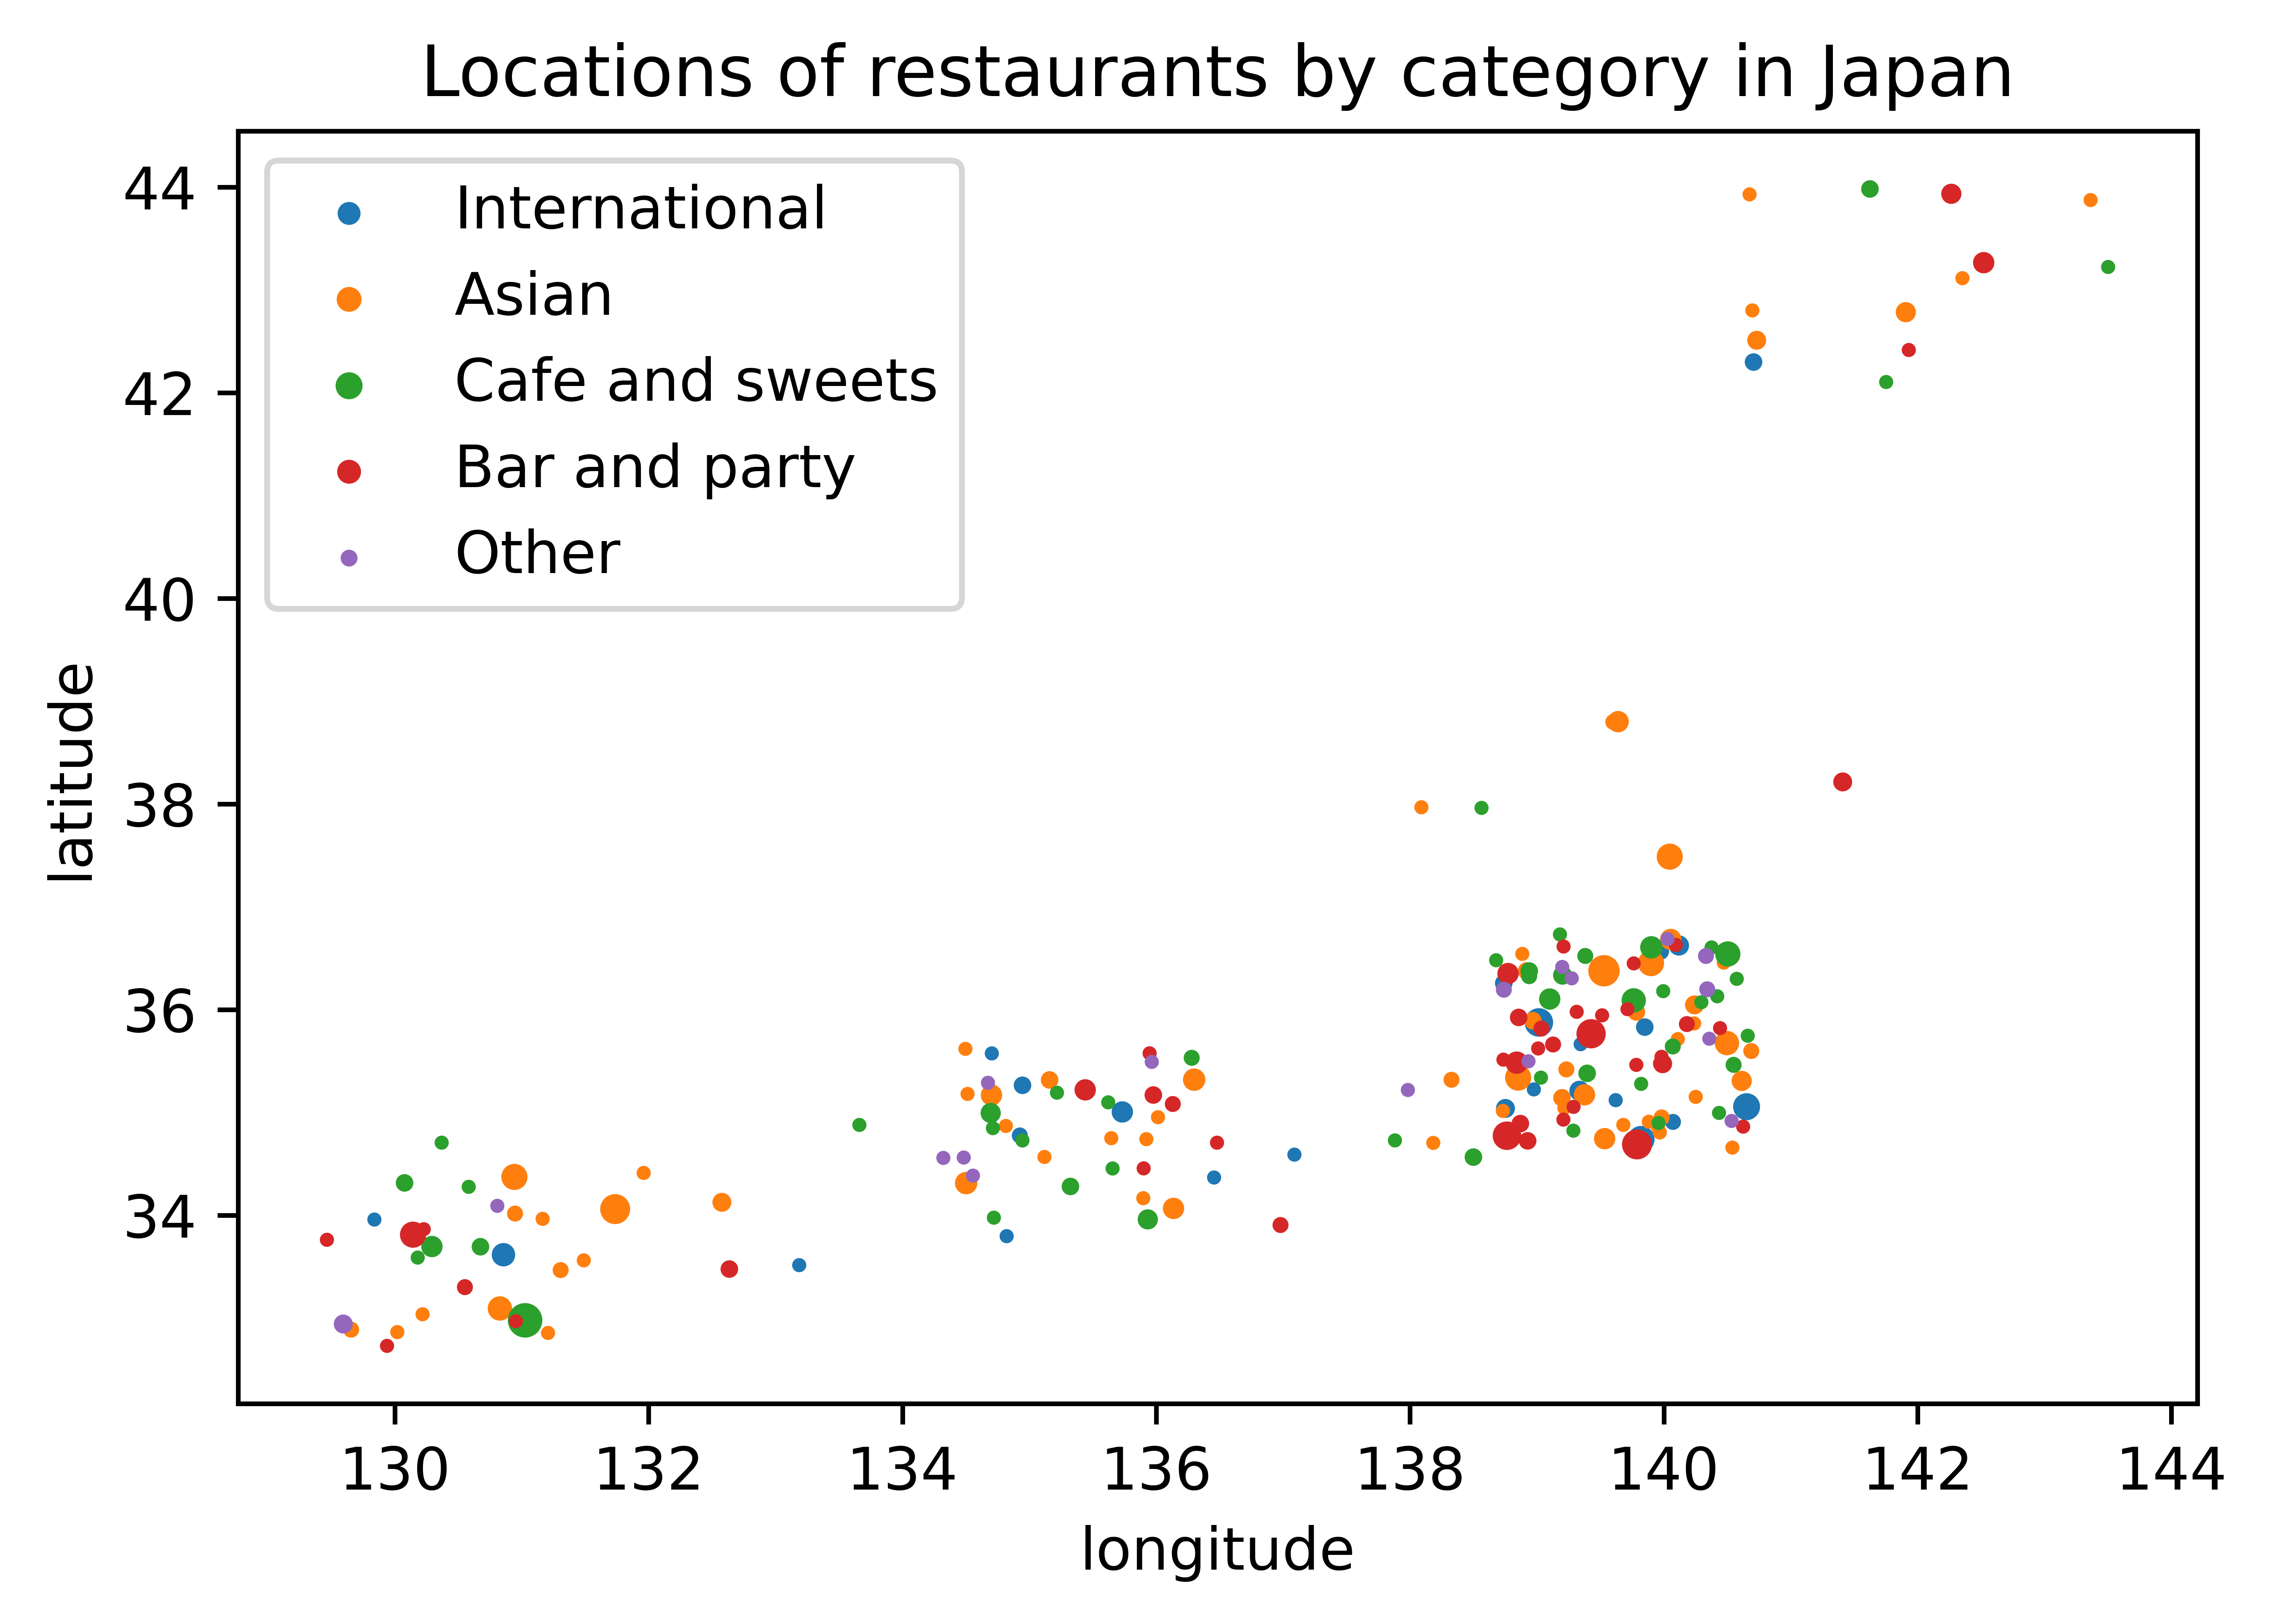

In [7]:
def mk_key(row):
    return (row['air_genre_name'], row['air_area_name'], row['latitude'], row['longitude'])


air_store_unique = dict()
for i in range(len(air_store_info.index)):
    k = mk_key(air_store_info.iloc[i])
    air_store_unique[k] = air_store_unique.get(k, 0) + 1

air_store_data = [list(x) + [air_store_unique[x]] for x in air_store_unique.keys()]
air_store_plot = pd.DataFrame(air_store_data, columns=['genre_name','area_name','latitude','longitude','count'])

plt.figure().set_dpi(1000)
air_store_plot.head(5)
import random
for k in collapse_key:
    k = k[0]
    d = air_store_plot[air_store_plot['genre_name'] == k]
    r = 2
    rx = np.random.random(len(d.index))*r - r/2
    ry = np.random.random(len(d.index))*r - r/2
    plt.scatter(d.loc[:,'longitude']+rx, d.loc[:,'latitude']+ry, s=d.loc[:,'count'], label=k)
plt.legend()
plt.ylabel("latitude")
plt.xlabel("longitude")
plt.title("Locations of restaurants by category in Japan")


       

***Your text goes here:***

Due to the way the plot makes use of random noises to spread out the points, it is hard to infer anything about the location of the restaurants within their respective clusters. To get more insight, you'd need to make plots that are focussed on specific regions.

Generally speaking, you can see where Japans metropolitan areas are. Notably, from left to right, Fukuoka & Kitakyushu, Kyoto & Kobe & Osaka, Tokyo and the Hokkaido island. If you compare the different clusters, you can see that there are considerably more 'Bar and party' locations in Tokyo than you can find in the rest of Japan. Additionally, there are no entries of type 'Other' in the Hokkaido area.

Also notice that the size of the points indicates how many restaurants are grouped together by area. This is because there are many establishments of the same kind in the same area. Plotting them individually would be unnecessary.

### Question 4: Mean number of visitors [15 marks]
The following question relates to the **air** data set. Plot the trend of the mean number of visitors to restaurants vs. a time unit of your choice (e.g, daily, weekly, etc…). What is the trend that you see?  

***Your code goes here:***

In [8]:
import datetime as dt
air_visit = pd.read_csv("Data/air_visit_data.csv")
air_visit.head(5)
visitor_counts = []
dates = []
year = 0
for d in sorted(air_visit.loc[:,'visit_date'].unique()):
    visitor_counts.append(air_visit[air_visit['visit_date']==d]['visitors'].sum())
    d = dt.date.fromisoformat(d)
    dates.append(d)
num_restaurants = len(air_visit.loc[:,'air_store_id'].unique())
l = len(dates)//7-1
weekly_visitors = []
weekly_dates = []
year = 0
for i in range(l):
    weekly_visitors.append(sum([visitor_counts[7*i+j] for j in range(7)]))
    d = dates[i*7]
    weekly_dates.append(d)
visitor_counts = weekly_visitors
dates = weekly_dates
print("Number of restaurants in total:", num_restaurants)

Number of restaurants in total: 829


Text(0.5, 1.0, 'Mean visitors per 7 day segment across all locations')

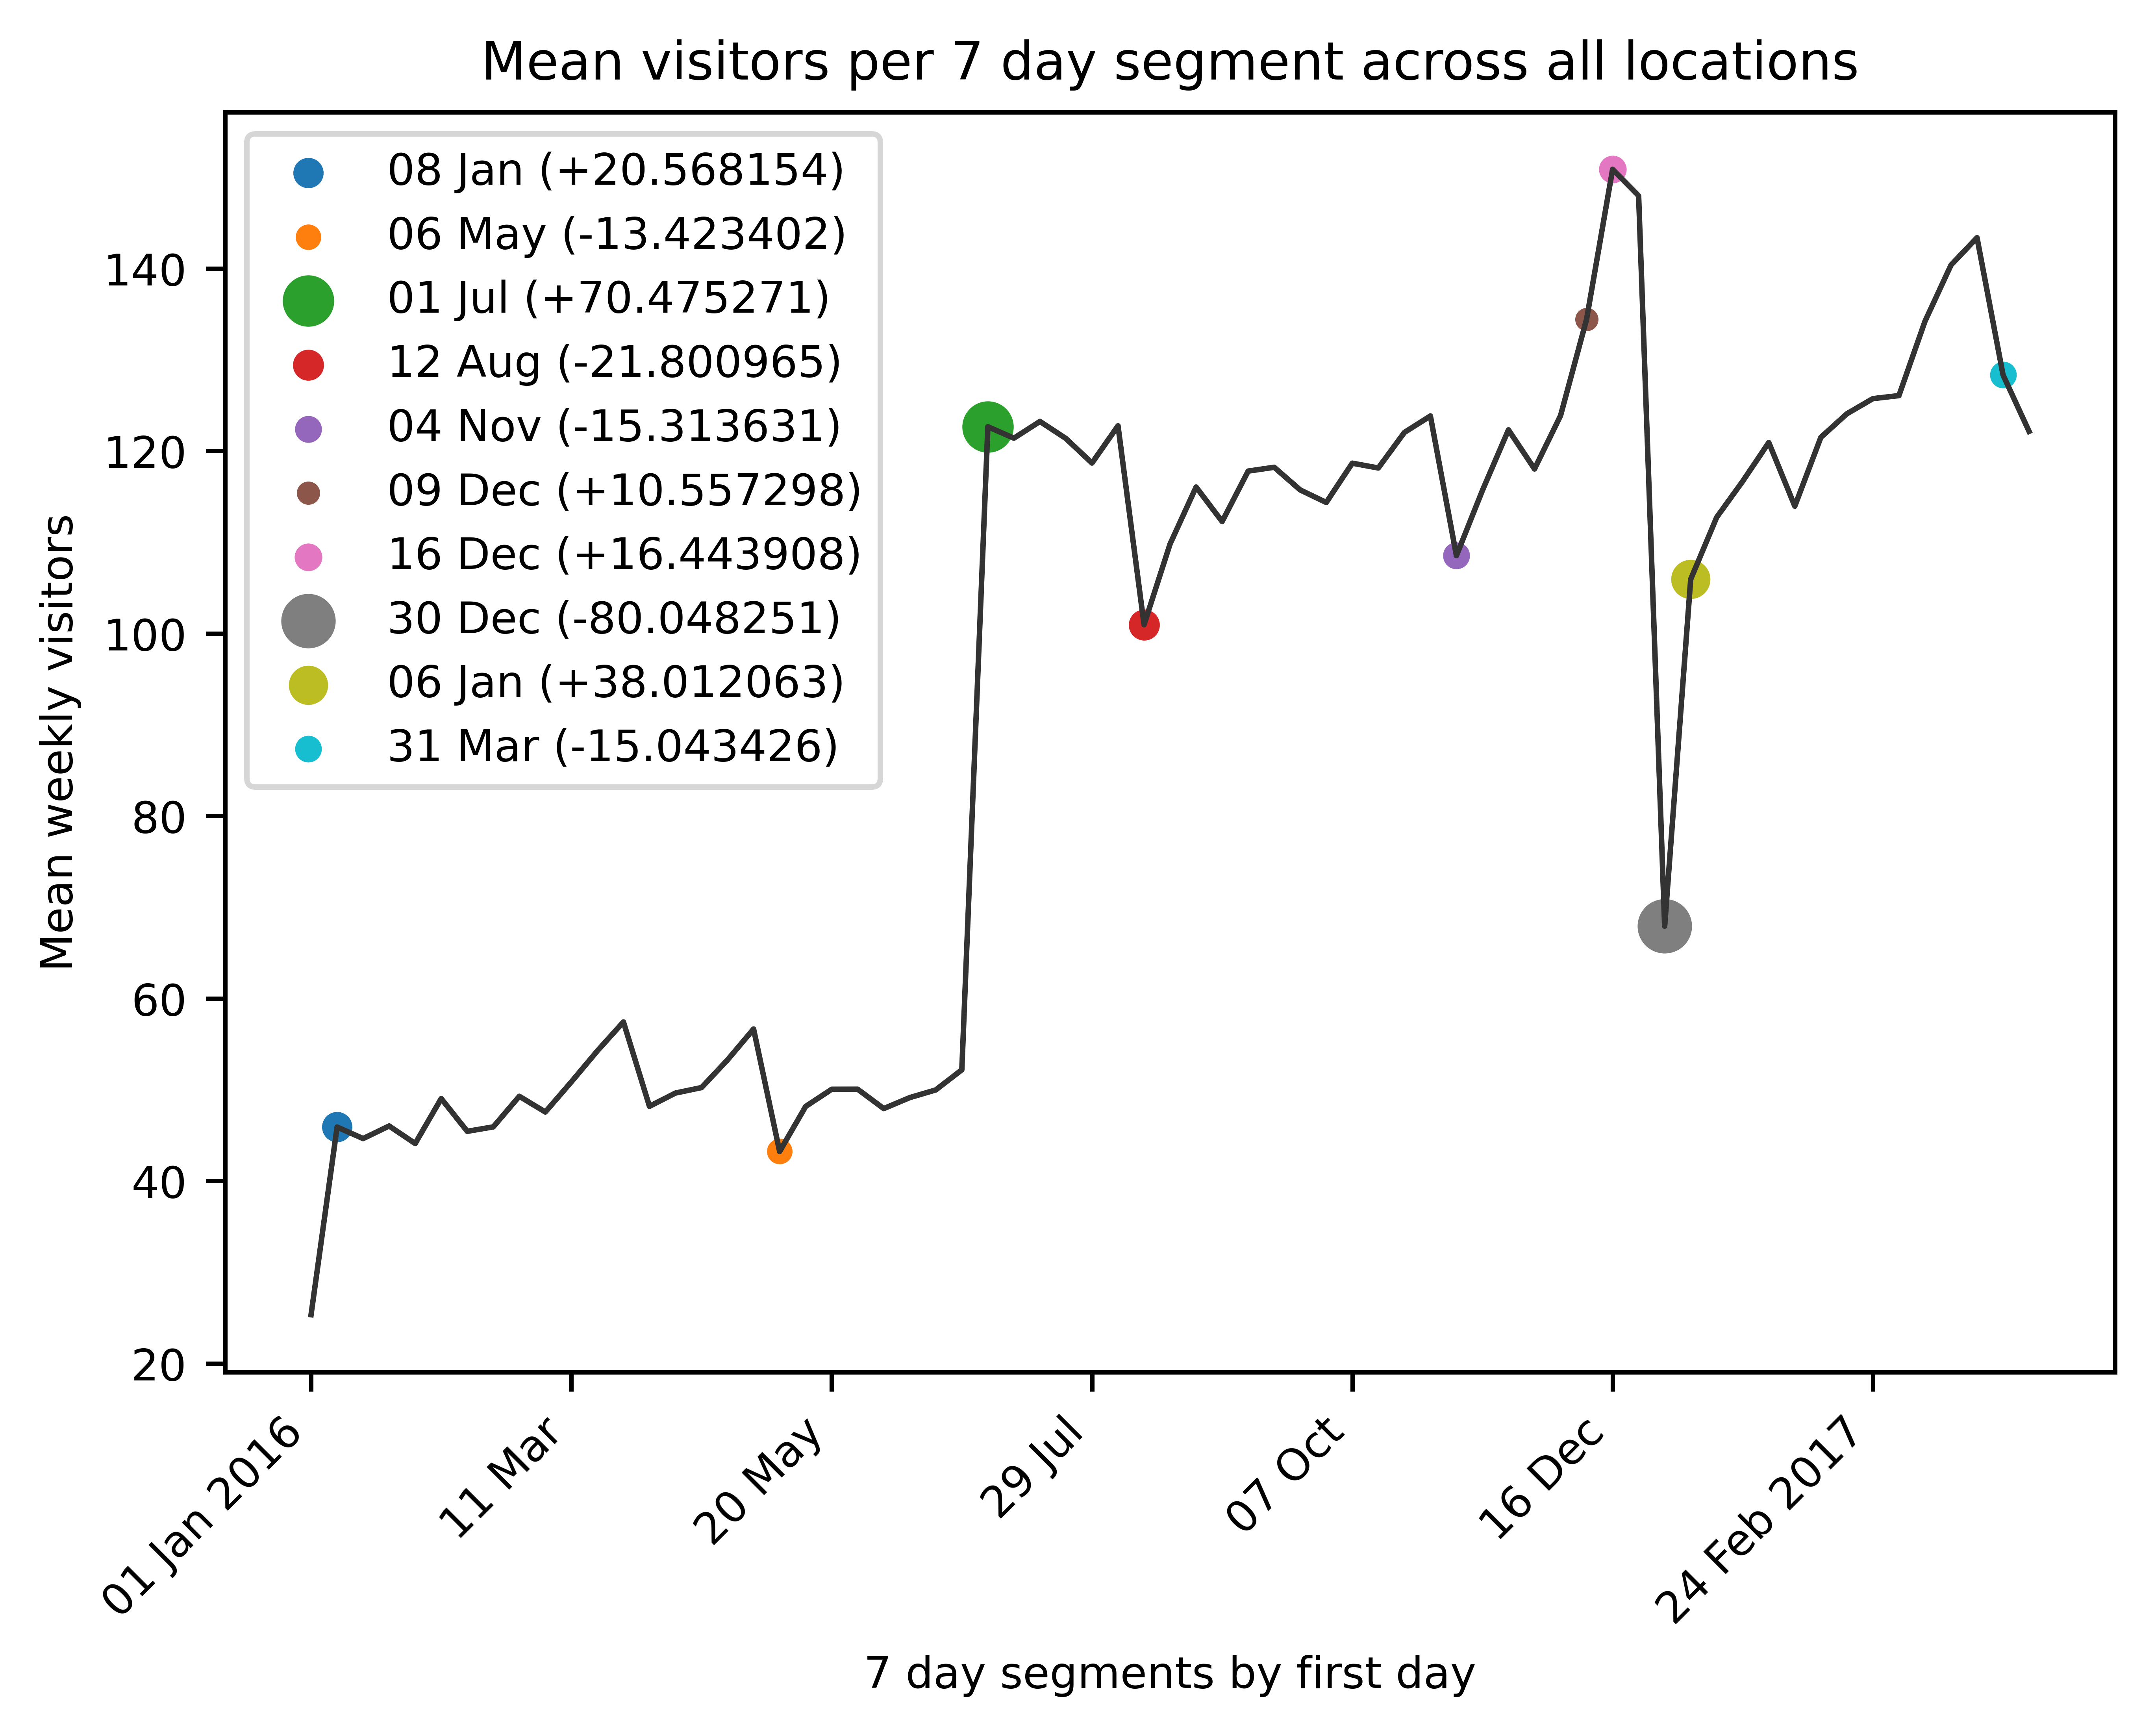

In [9]:
short_fmt = "%d %b"
long_fmt = "%d %b %Y"
l = len(dates)
plt.rc("font", **{'size': 8})
fig = plt.figure()
fig.set_dpi(1000)
ax = fig.add_axes([0.1,0.1,0.8,0.8])
mean_visitors = [c/num_restaurants for c in visitor_counts]
ax.plot(range(l),mean_visitors,color='#333',linewidth=1)
year = 0
plot_dates = []
for i in range(l//10+1):
    d = dates[i*10]
    if d.year == year:
        plot_dates.append(d.strftime(short_fmt))
    else:
        year = d.year
        plot_dates.append(d.strftime(long_fmt))
ax.set_xticks(xt := [10*i for i in range(l//10+1)])
ax.set_xticklabels(plot_dates)
jumps = []
t = 10
for i in range(1,len(visitor_counts[1:])):
    c = mean_visitors[i]
    p = mean_visitors[i-1]
    if abs(c-p) > t:
        jumps.append((i, c-p))
import matplotlib.colors as mcolors
from random import shuffle
cols = iter(mcolors.TABLEAU_COLORS)
for j,d in jumps:
    c = mean_visitors[j]
    ax.scatter(j, c, s=abs(d), label=f'{dates[j].strftime(short_fmt)} ({d:+f})')
fig.autofmt_xdate(rotation=45)
ax.yaxis.set_ticks(np.arange(20, 141, 20))
ax.yaxis.set_ticklabels(np.arange(20, 141, 20))
ax.set_xlabel("7 day segments by first day")
ax.set_ylabel("Mean weekly visitors")
ax.legend()
ax.set_title("Mean visitors per 7 day segment across all locations")

***Your text goes here:***

There are a few notable observations to make:

1. Up until the first July week there are significantly fewer visits in total than in the time after that. Except maybe the first week of 2017, but even then the numbers are higher. Initially I thought this was due to the holidays starting but that would imply that the visits would fall again come autumn. A possible explanation is that the owners or (inclusively) the visitors found out about the platform and set up accounts in anticipation of the holiday season. This might have lead to a permanent increase in users and thus recorded visits.
2. The first weeks of both years (2016 and 2017) have significantly lower values than their neighbourhoods. This might be down to people having gone out over Christmas and thus creating a saturation across the population.
3. The busiest time were the two weeks around Christmas 2016.
4. There are two outliers during summer which I cannot explain with certainty.
5. There is a steady increase from early November up to Christmas.

### Question 5: Histogram [15 marks]
The following question relates to the **hpg** data set. Create a histogram of the number of visitors per day of the week (Sunday, Monday, …, Saturday). What can you infer from this graph? 

***Your code goes here:***

In [10]:
import datetime as dt
hpg_reserve = pd.read_csv('Data/hpg_reserve.csv')
print("Number of entries:",len(hpg_reserve.index))
visits_per_weekday = np.zeros(7, dtype=np.uint64)
dates = hpg_reserve.loc[:, 'visit_datetime']
weekday_labels = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
for i in range(7):
    # We're using this lambda to make the calculation fast
    # Anything we try to do in Python is slow and I'm assuming that datetime as well
    # as pandas' integrated functions are implemented in C so it's *a lot* quicker
    f = lambda x: dt.datetime.fromisoformat(x).isoweekday()-1 == i
    visits_per_weekday[i] += \
        hpg_reserve[hpg_reserve['visit_datetime'].apply(f)].loc[:, 'reserve_visitors'].sum()

Number of entries: 2000320


[ 813931  932183 1218052 1224419 2658732 2286390 1015486]


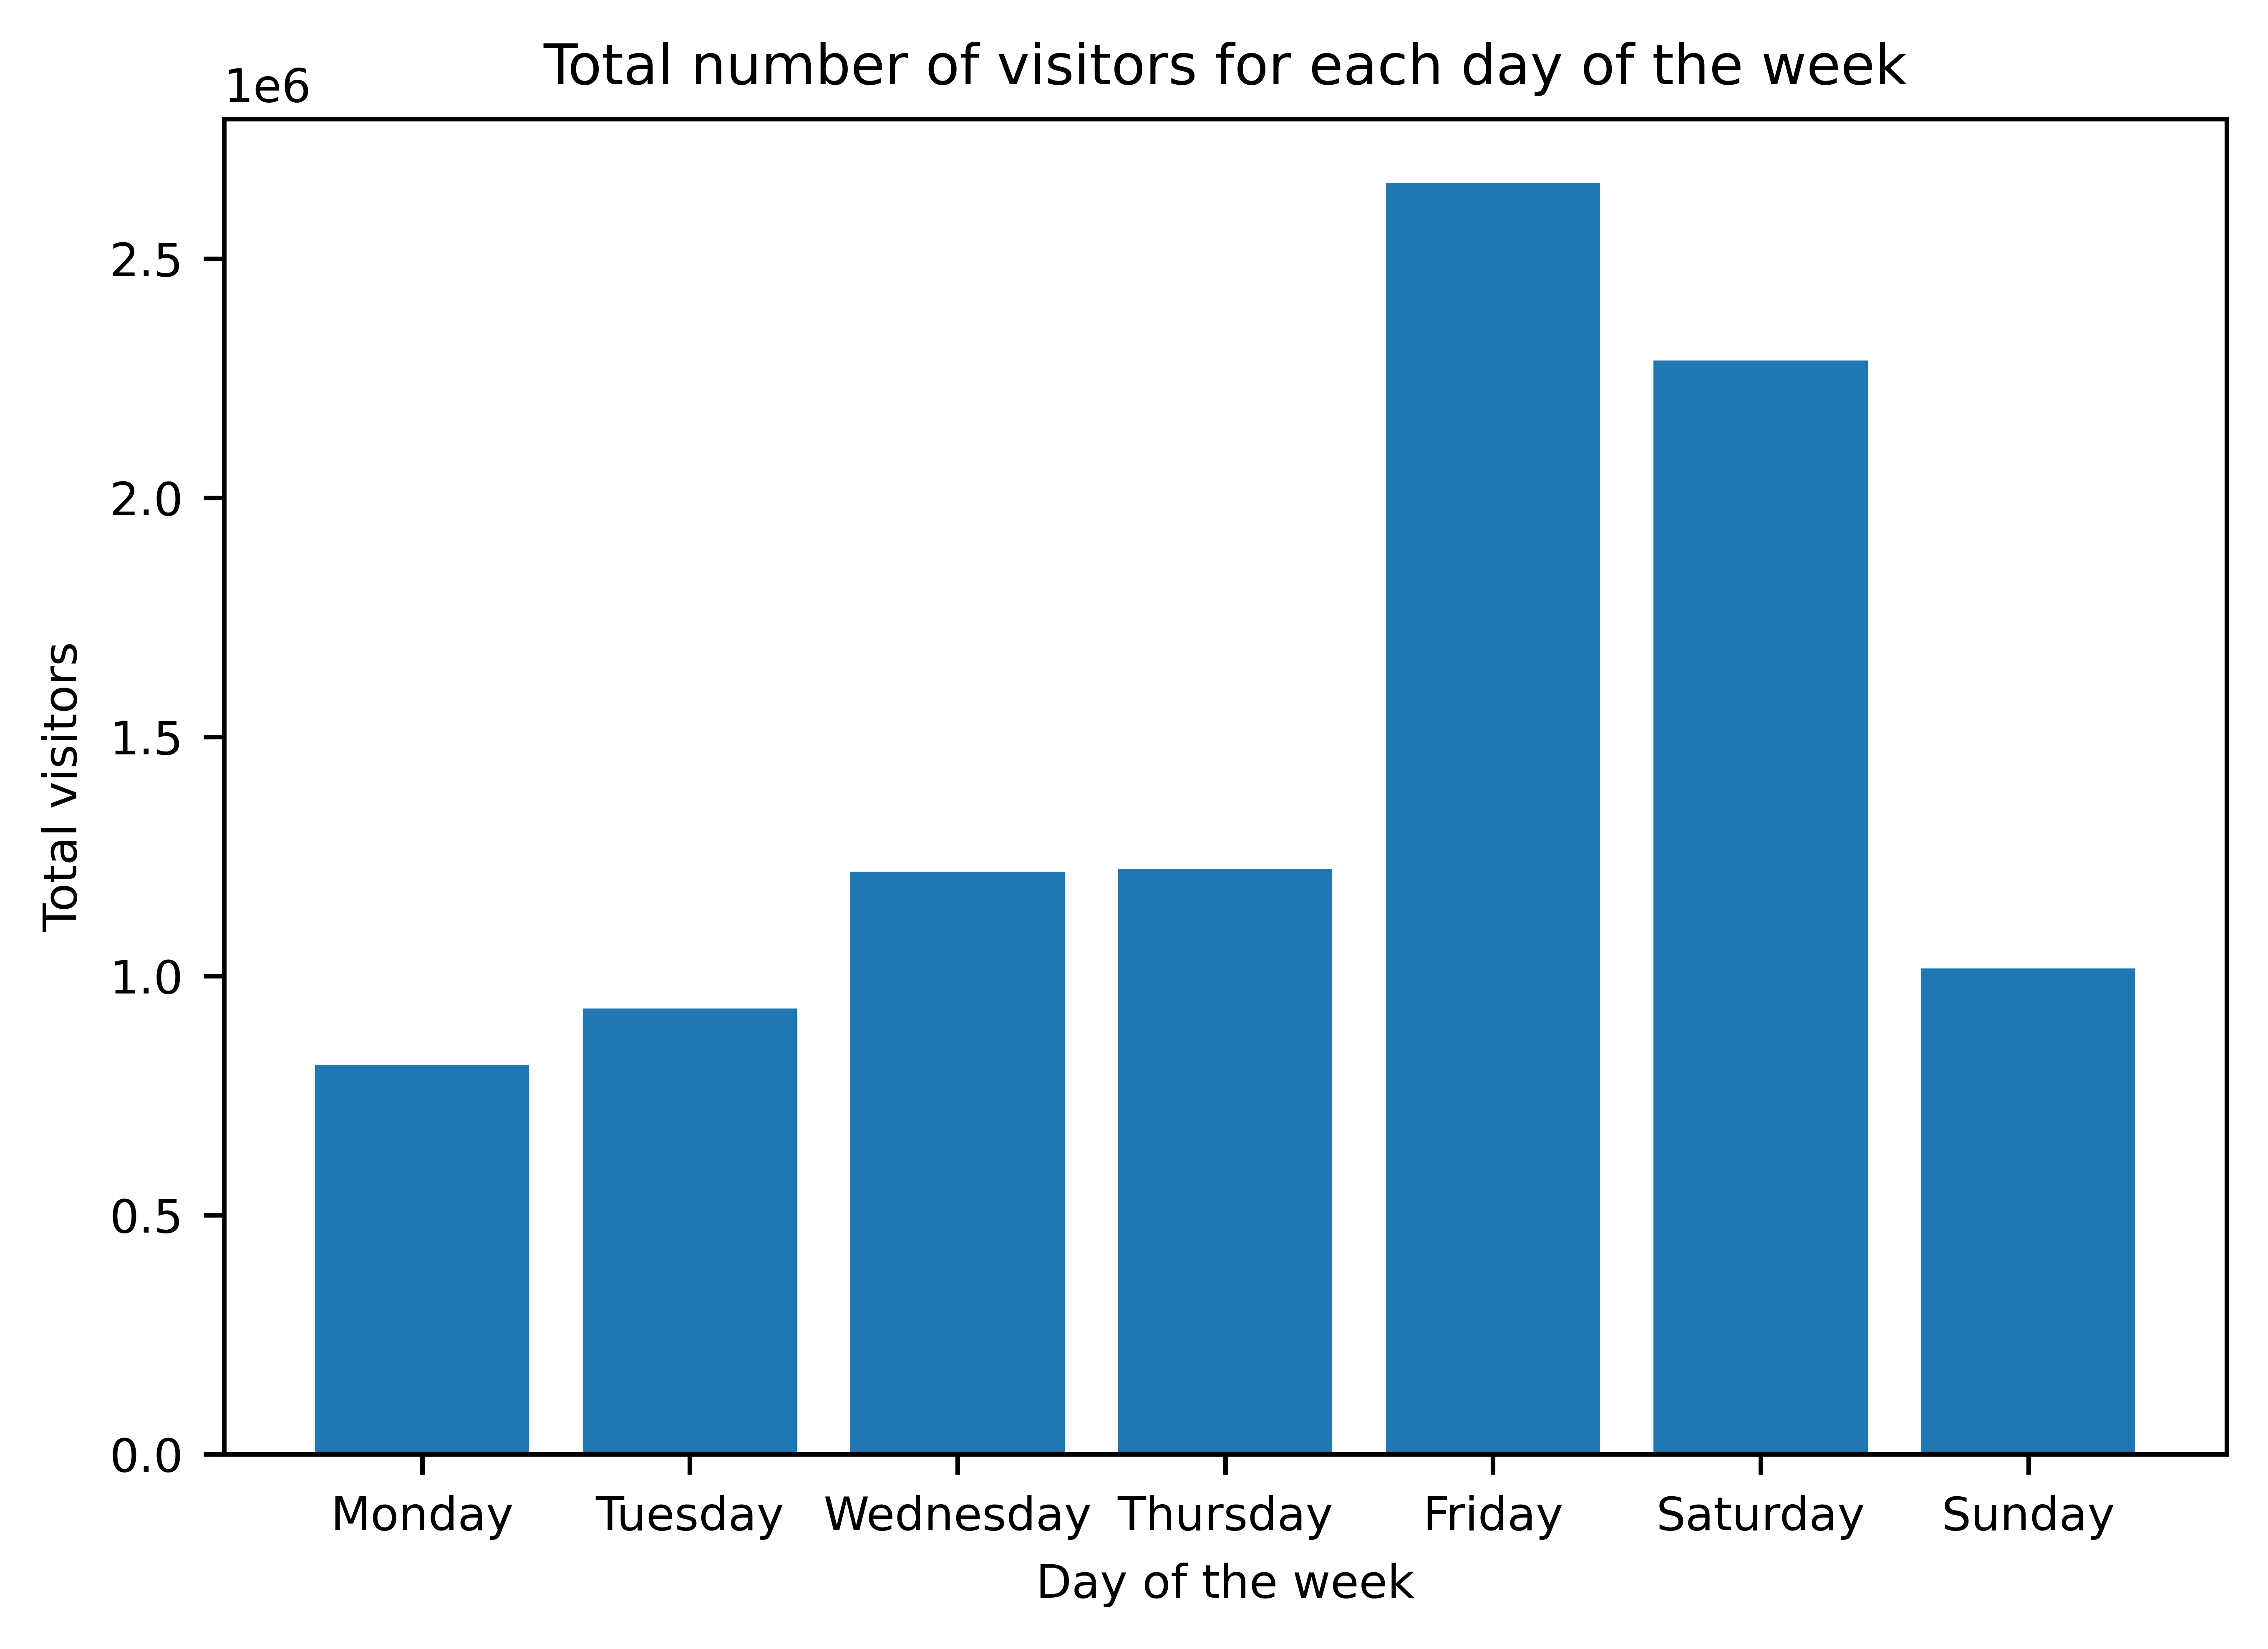

In [11]:
fig = plt.figure()
fig.set_dpi(1000)
ax = fig.add_axes([0.1,0.1,0.8,0.8])
ax.bar(weekday_labels, visits_per_weekday)
ax.set_ylabel("Total visitors")
ax.set_xlabel("Day of the week")
plt.title("Total number of visitors for each day of the week")
print(visits_per_weekday)

***Your text goes here:***

By far the most popular days are Friday and Saturday. In general there seems to be an increase from Monday to Friday. Notably, there were about three times as many people eating out on Fridays as there were on Mondays.

### Question 6: Food passion [25 marks]

The following question relates to the **air** data set. We wish to determine which restaurant genre Japanese people are most passionate about. To this end we will analyse how much time people plan ahead before visiting a restaurant.  

- Compute the time difference between reservation time and visit time. 

- Compare the time differences among restaurant genres using a visualization of your choice. Tip: In order to avoid outliers, it might be best to choose an upper threshold for values of preparation time. You may want to use the genre categories used in question 3 to reduce clutter. 

***Your code goes here:***

In [12]:
import datetime as dt
air_store_info = pd.read_csv('Data/air_store_info.csv')
air_visit_data = pd.read_csv('Data/air_visit_data.csv')
air_store_info['air_genre_name'].unique()
collapse_key = [('International',['Italian/French','International cuisine', 'Western food']), 
                ('Asian',['Yakiniku/Korean food','Izakaya','Okonomiyaki/Monja/Teppanyaki','Asian','Japanese food']),
                ('Cafe and sweets', ['Cafe/Sweets']),
                ('Bar and party', ['Dining bar', 'Bar/Cocktail', 'Karaoke/Party']),
                ('Other', ['Other', 'Creative cuisine'])]
collapse_dict = dict()
for v,ks in collapse_key:
    for k in ks:
        collapse_dict[k] = v
air_store_info = air_store_info.apply(lambda x: x.apply(lambda y: collapse_dict[y]) if x.name=='air_genre_name' else x)
air_reserve = pd.read_csv('Data/air_reserve.csv').merge(air_store_info, how='inner', on='air_store_id')

NUM_HOURS = 1
NUM_BUCKETS = int(31*24/NUM_HOURS)
WIDTH_BUCKET = int(3600*NUM_HOURS)
MAX_TRUNC = 0.01


def record(row, history):
    t0 = dt.datetime.fromisoformat(row.loc['visit_datetime'])
    t1 = dt.datetime.fromisoformat(row.loc['reserve_datetime'])
    i = int((t0-t1).total_seconds()//WIDTH_BUCKET)
    if i >= NUM_BUCKETS:
        i = NUM_BUCKETS-1
    history[i] += 1 
    
    
history = np.zeros((len(collapse_key),NUM_BUCKETS), dtype=np.uint64)
for i,(k, _) in enumerate(collapse_key):
    air_reserve[air_reserve['air_genre_name']==k].apply(lambda x: record(x, history[i]), axis=1)


def truncate_histograms(data, t):
    min_len = 0
    for row in data:
        while min_len < len(row) and row[min_len:].sum() / row.sum() > t :
            min_len += 1
    (rows, cols) = data.shape
    new_data = np.zeros((rows, min_len))
    for i,row in enumerate(data):
         new_data[i, 0:min_len-1] = row[:min_len-1]
         new_data[i, min_len-1] = row[min_len-1:].sum()
    return new_data 
# interprets each element d_i as df/dt at t_0-i and
# integrates to find f(t) for all t in [t_0-len(d), t_0]
# each f is then returned as a fraction of the entire integral
def get_p(data):
    s = 0
    l = len(data)
    new_data = np.zeros(l)
    for i in range(l):
        s += data[l-1-i]
        new_data[i] = s
    return new_data / s
history = truncate_histograms(history, 0.01)

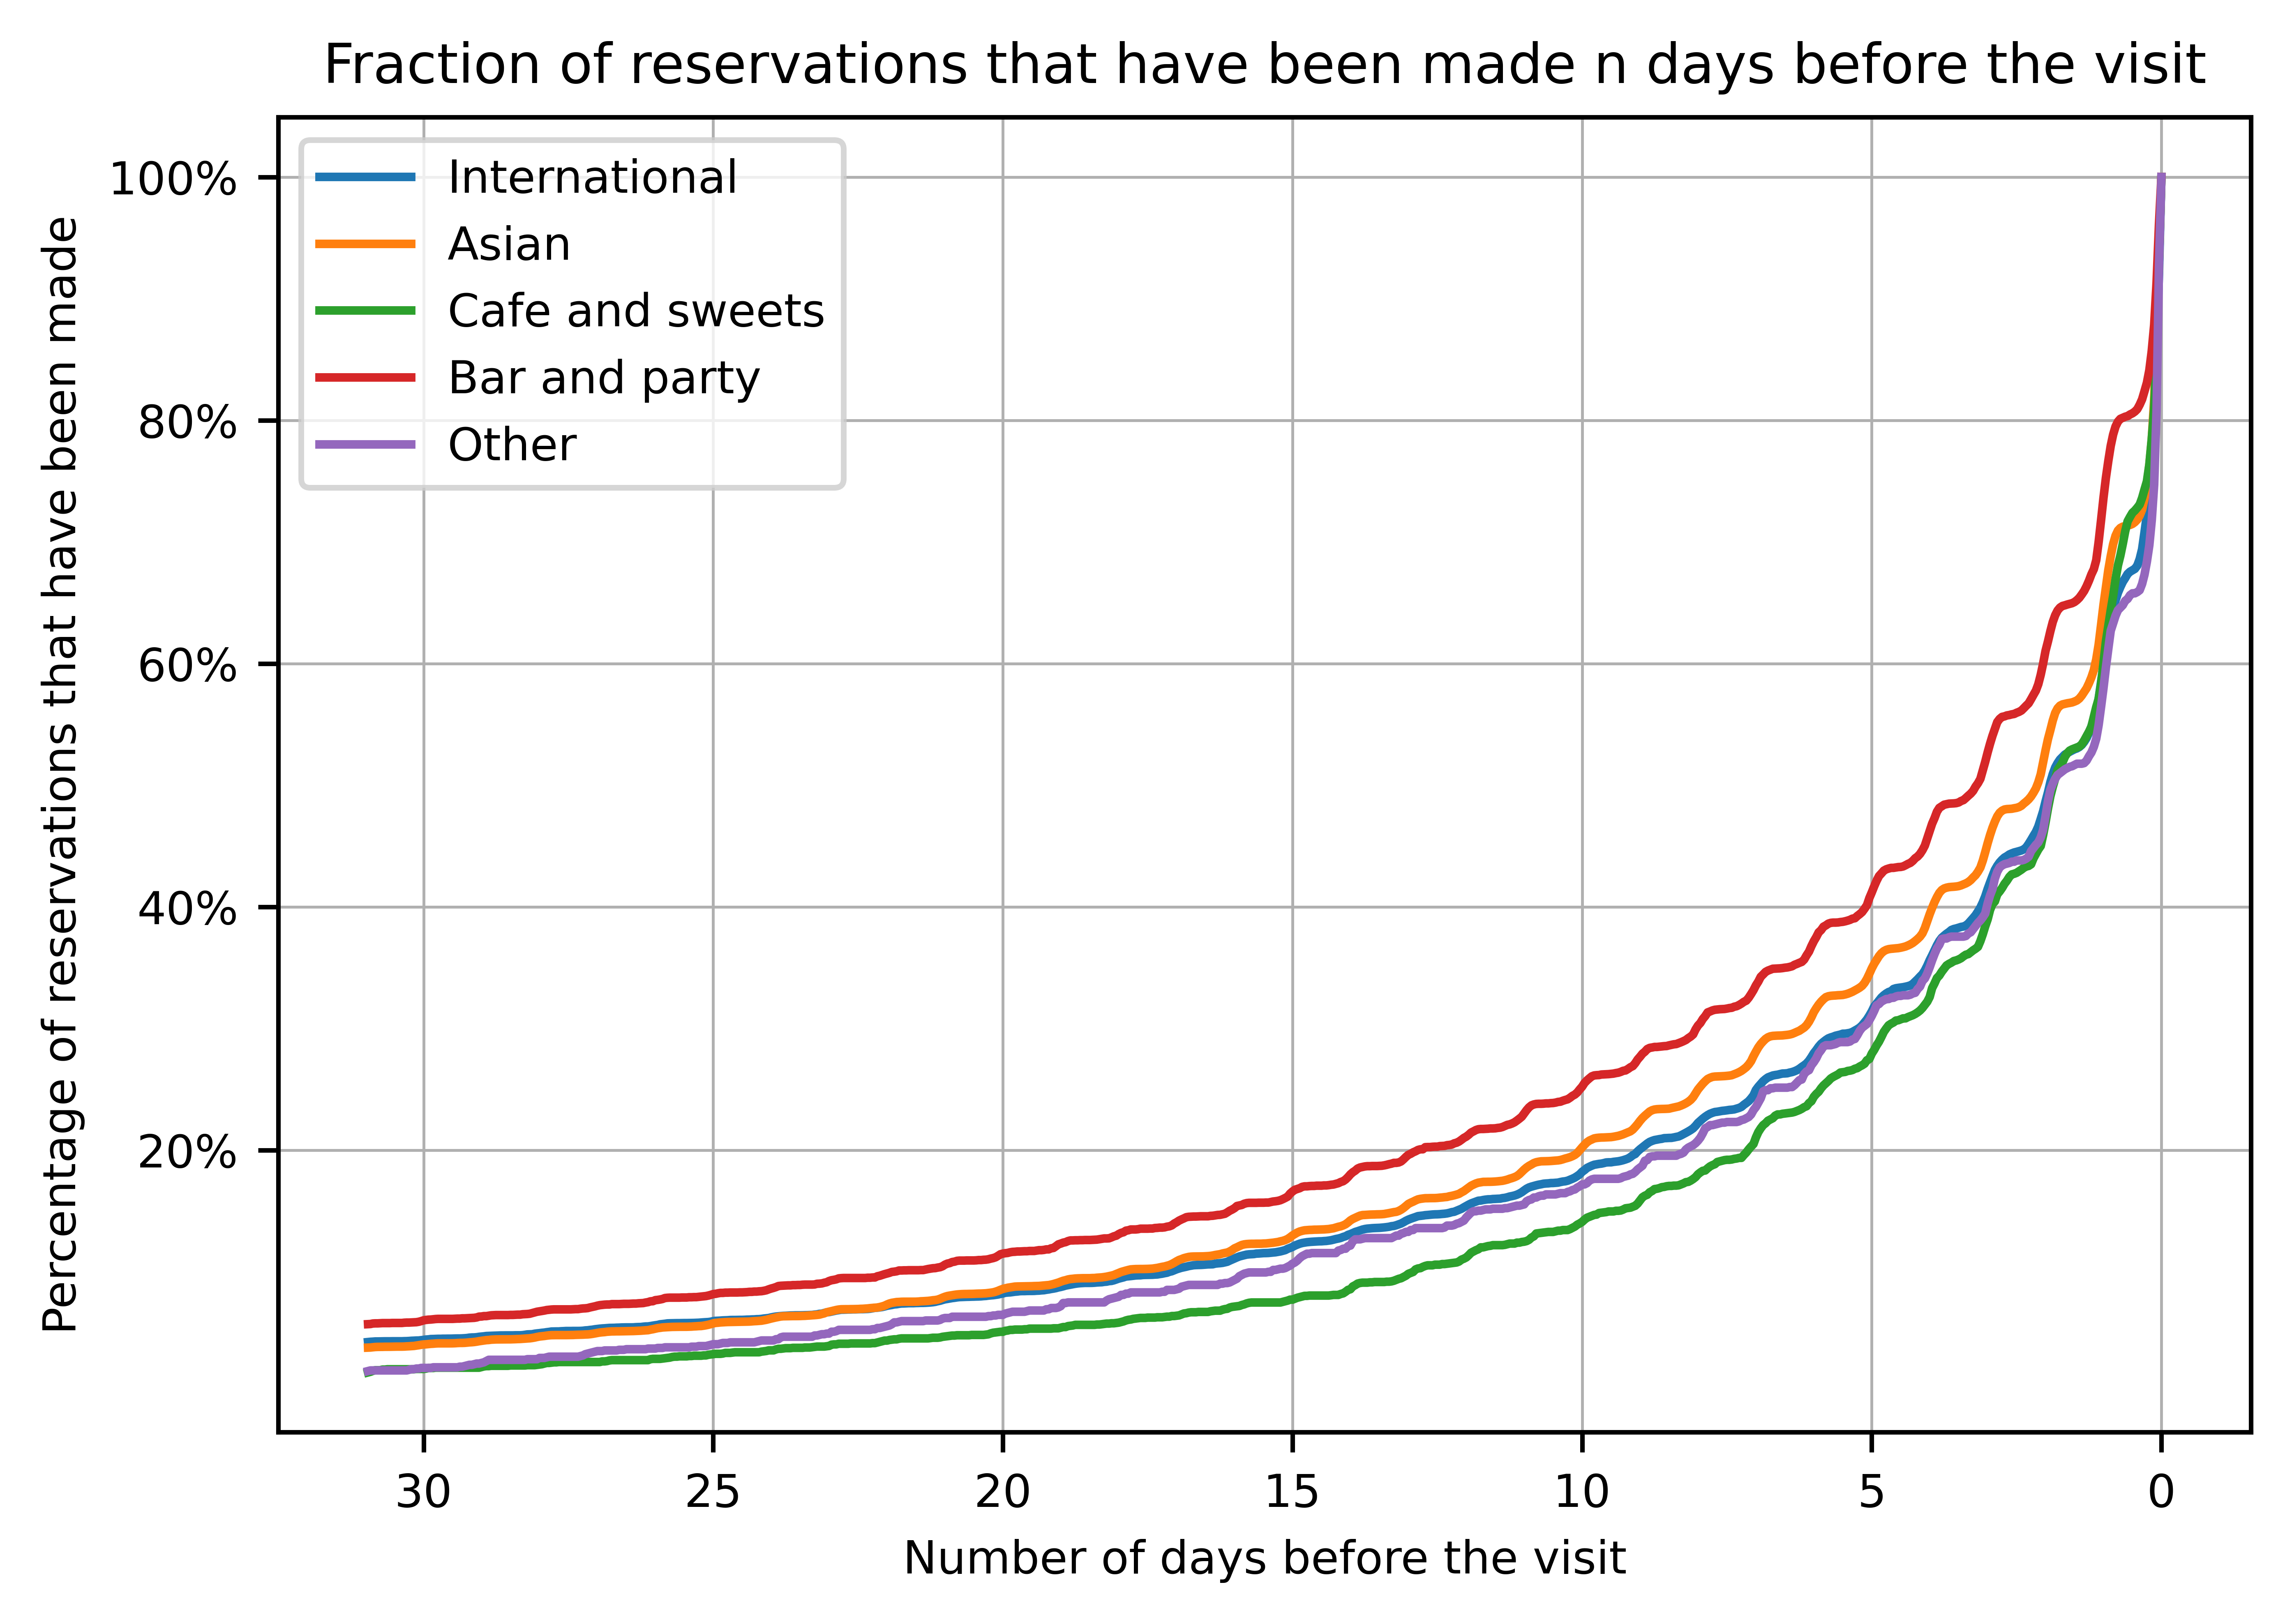

In [13]:
fig = plt.figure()
fig.set_dpi(1000)
ax = fig.add_axes([0.1,0.1,0.8,0.8])
for i,row in enumerate(history):
    p = get_p(row)
    x = list(range(1-len(p), 1))
    ax.plot(x, p, label=collapse_key[i][0])
x_ticks = list(reversed(x))[::int(24*5/NUM_HOURS)]
ax.set_xticks(x_ticks)
ax.set_xticklabels(map(lambda x: f'{abs(int(x/24))}', x_ticks))
y_ticks = [0.2*i for i in range(1,6)]
ax.set_yticks(y_ticks)
ax.set_yticklabels(map(lambda x: f'{int(x*100)}%', y_ticks))
#ax.vlines(x_ticks, 0, 1, linewidth=1, color='black')
ax.legend()
ax.grid(linewidth=0.5, axis='both')
ax.set_xlabel('Number of days before the visit')
ax.set_ylabel('Percentage of reservations that have been made')
ax.set_title('Fraction of reservations that have been made n days before the visit')
plt.show()

***Your text goes here:***

You can see that at each point in time before the reservation time, a larger proportion of reservations have been made for bar and party establishments than for any other category. This shows that events in those establishments are organised further in advance.

Cafe and sweets locations receive their reservations consistently later with respect to the visit time. This seems to indicate that the visits there are more spontaneous.

**Notes**:

It is interesting to observe that the majority of reservations are made close to an integer number of days before the time of the visit. It's because of this that the curves have the distinct step-like shape. The relation makes sense because times that are not close to such an integer are very likely to unfavourable, e.g. during the night. 

Unsurprisingly, a significant number of reservations, about 20 to 30 percent, are made less than twelve hours before the visit. On the other hand, around 5 to 10 percent of reservations are made over a month before the event.

I have considered plotting the difference of the displayed quantities to the average over all the reservations but this would have made the graph less intuitive and harder to comprehend. I feel like, to truly understand what is going on, one would need to see the above representation of the data first. Since I seem to be limited to one visualisation, this is not a possibility.

That being said, I feel like the current version displays more data than is required or interesting for our goal. We don't really need to know when most of the reservations happen to compare each genre. This is something we could remove by choosing the alternative representation.